# E-commerce project using linear regression

An e-commerce company based in New York City sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired me on contract to help them figure it out! Let's get started!

Let's play with the  customer data 

Datasource : https://www.kaggle.com/datasets/srolka/ecommerce-customers/code

In [42]:
# importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats

from scipy.stats.mstats import normaltest

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Import the dataset

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
# Let's check the dimension of the dataset

len(df)

500

In [4]:
df.describe()   # statistical parameters of the digits-columns

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
# check the datatypes of the each pandas series

df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [7]:
# check for the null values (if any)

df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Great ! Looks like there are no null values at all ! This makes the data analysis part super easy...

# Exploratory Data Analysis

In [8]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


The 'Email','Address' and 'Avatar' column doesn't have any implication regarding our analysis. So those columns can be dropped

In [9]:
df_new = df.drop(['Email','Address','Avatar'],axis=1)
df_new.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


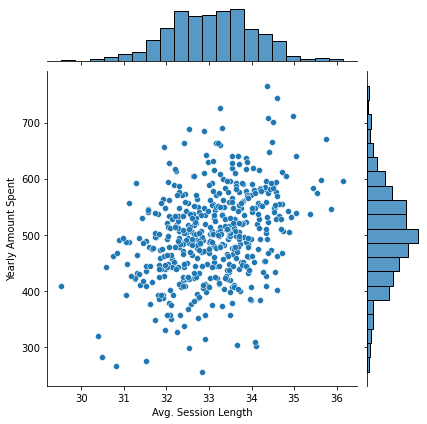

In [10]:
# Let's see if there are any correlation b/w Avg. session length and yearly amount spent

sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent',data=df_new)

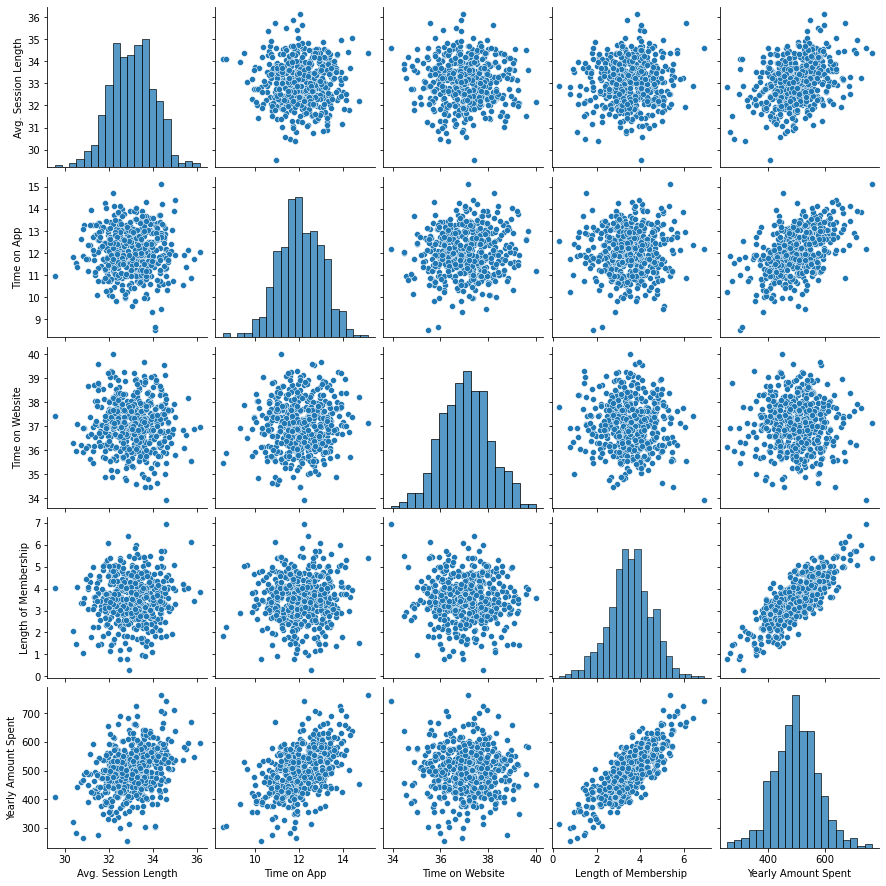

In [11]:
sns.pairplot(df_new)

Based on the plot,it looks like Length of Membership has some clear correlation with Yearly Amount Spent...

Let's confirm it by plotting a correlation matrix

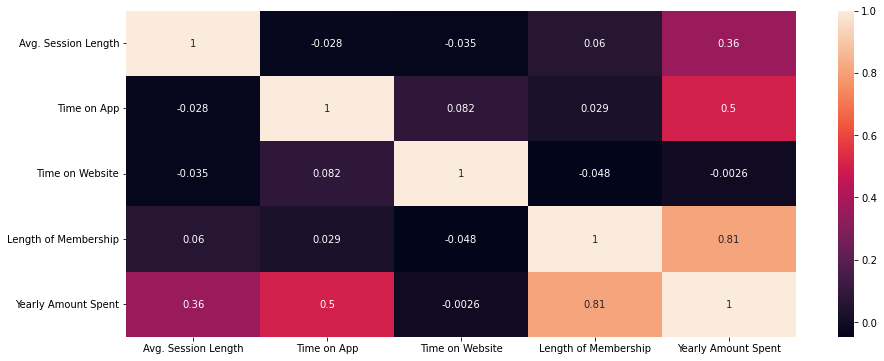

In [12]:
plt.figure(figsize=(15,6))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

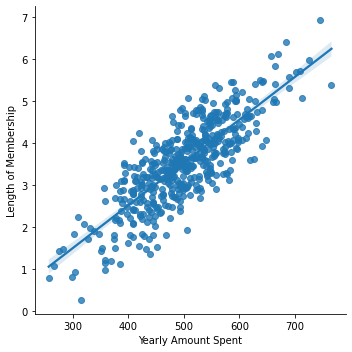

In [13]:
# Creating a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership

sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=df_new)

Now,I'll only use the columns with float datatypes in the training and testing dataset.
Yearly amount spent will be my dependent variable/ target variable...

Let's look at the histogram distribution of target variable ' Yearly Amount spent'

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

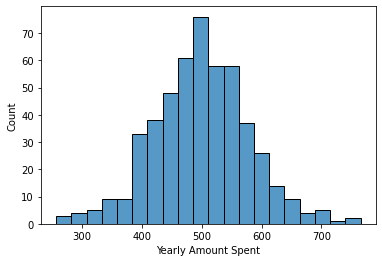

In [15]:
sns.histplot(df_new['Yearly Amount Spent'])

In [18]:
normaltest(df_new['Yearly Amount Spent']).pvalue  

0.16107336506525693

p-value > 0.05 ( or 0.01 somewhere ) means the null hypothesis (here the null hypothesis : the dataset is normally distributed)
 is true...Here, p-value = 0.16. Hence, the null-hypothesis holds true.

In [19]:
# Hence, since it is normally distributed, no need to apply log transformation

In [20]:
df_new

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


Text(0.5, 0.98, 'Scatter-plot and boxplot of Length of membership and Time on app')

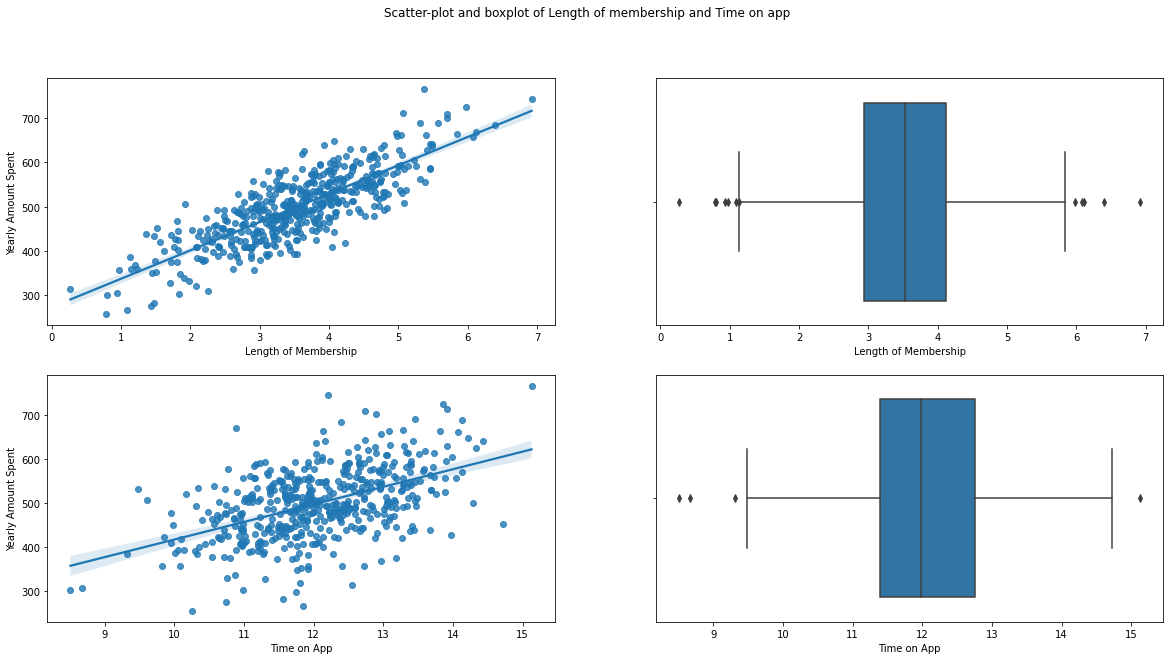

In [26]:
fig,ax = plt.subplots(2,2,figsize=(20,10))

sns.regplot(x=df_new['Length of Membership'],y=df_new['Yearly Amount Spent'],ax=ax[0,0])
sns.boxplot(x=df_new['Length of Membership'],ax=ax[0,1])

sns.regplot(x=df_new['Time on App'],y=df_new['Yearly Amount Spent'],ax=ax[1,0])
sns.boxplot(x=df_new['Time on App'],ax=ax[1,1])

fig.suptitle('Scatter-plot and boxplot of Length of membership and Time on app')

# Training and Testing dataset

In [29]:
X = df_new[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [30]:
y = df_new['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Training the model

In [37]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [41]:
model.score(X_train,y_train)

0.9849770665743345

In [38]:
model.coef_

array([26.01559769, 38.70128922,  0.81007515, 61.5700053 ])

# Testing the test dataset

In [39]:
y_pred = model.predict(X_test)

In [40]:
model.score(X_test,y_pred)

1.0

In [43]:
mean_absolute_error(y_test,y_pred)    # Evaluating the model

7.970595297115124

In [46]:
cof_table = pd.DataFrame(model.coef_,X.columns)
cof_table.columns = ['Coefficients']

cof_table

,Coefficients
Avg. Session Length,26.015598
Time on App,38.701289
Time on Website,0.810075
Length of Membership,61.570005
